LR: 0.794619 (0.026552)
LDA: 0.790137 (0.031293)
KNN: 0.790137 (0.038197)
CART: 0.786816 (0.024462)
NB: 0.785655 (0.024115)
SVC: 0.643184 (0.070485)
Perceptron: 0.783396 (0.067774)


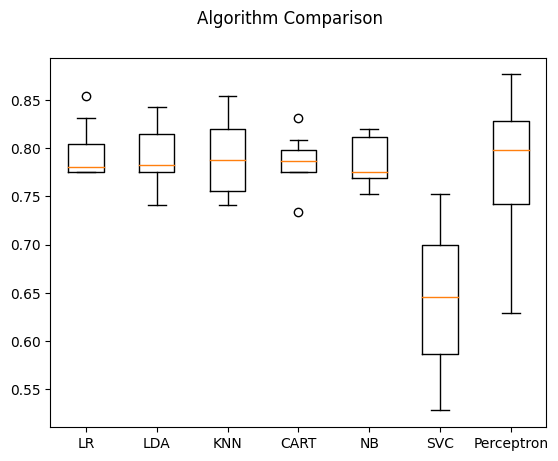

In [11]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
# load dataset

url = "CSV/titanic.csv"
dataframe = pandas.read_csv(url)
dataframe = dataframe.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
dataframe = pandas.get_dummies(dataframe, columns=['Sex', 'Embarked'])

dataframe['Age'].fillna(dataframe['Age'].median(), inplace=True)
dataframe['Survived'] = dataframe['Survived'].astype(int)
dataframe = dataframe.astype(int)


array = dataframe.values
X = array[:,1:]
Y = array[:,0]



# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('Perceptron', Perceptron(tol=1e-3, random_state=0)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()